### Задание
Дана фотография чека. Подготовить изображение для распознавания, используя изученные методы пороговой обработки. 

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imgshow(image, conversion=cv2.COLOR_BGR2RGB):
    image = cv2.cvtColor(image, conversion)
    plt.imshow(image)
    plt.axis("off")
    plt.xticks([])
    plt.yticks([])
    plt.show()

Импортируем изображение, преобразуем его в градации серого функцией cv2.COLOR_BGR2GRAY:

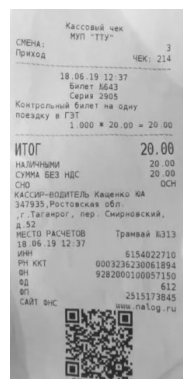

In [2]:
img = cv2.imread('pictures/receipt.jpg')
img_original = cv2.imread('pictures/receipt.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
imgshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

В данном случае применим адаптивный порог, так как освещение на фото неравномерное. <br> Воспользуемся функцией cv2.adaptiveThreshold() с флагом cv2.ADAPTIVE_THRESH_MEAN_C, который в качестве порогового значения берет среднее арифметическое всех пикселей в окрестности выделенного пикселя.

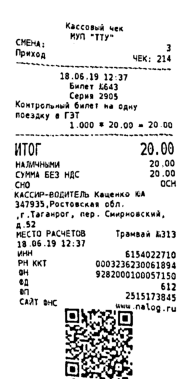

In [3]:
adapt_th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 15)
adapt_th = cv2.cvtColor(adapt_th, cv2.COLOR_BGR2RGB)
imgshow(adapt_th)

Также, можно воспользоваться бинаризацией Оцу, передав в функцию cv2.threshold() флаги cv2.THRESH_BINARY + cv2.THRESH_OTSU:

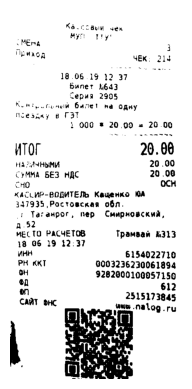

In [4]:
ret,th_otsu = cv2.threshold(img,177,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
th_otsu = cv2.cvtColor(th_otsu, cv2.COLOR_BGR2RGB)
imgshow(th_otsu);

Сравним полученные результаты:

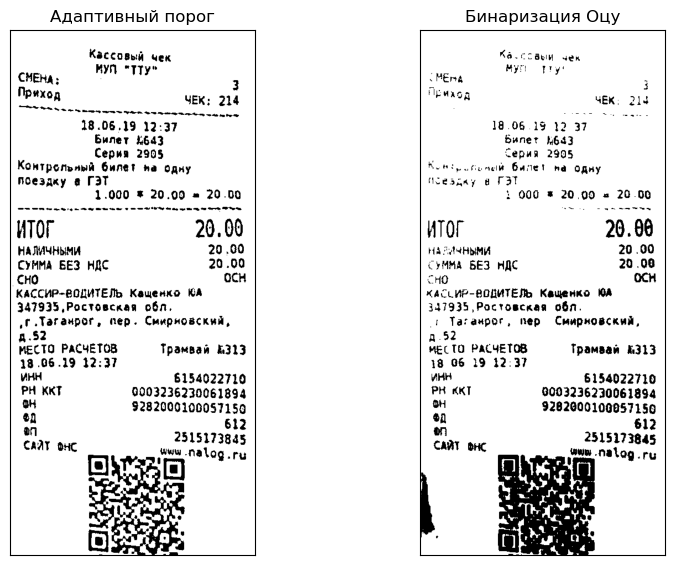

In [5]:
images = [adapt_th, th_otsu]
titles = ["Адаптивный порог", "Бинаризация Оцу"]
plt.figure(figsize=(15,15))
for i in range(2):
    plt.subplot(2,3,i+1),plt.imshow(images[i])
    plt.xticks([]),plt.yticks([])
    plt.title(titles[i])
plt.show();

Наиболее удачным получился вариант с использованием функции с адаптивным порогом.